In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
%matplotlib notebook

In [83]:
from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import make_grid
from blg_strain.microscopic import feq_func
from blg_strain.utils.const import muB, q, hbar

In [84]:
from matplotlib import colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, vcenter=None, clip=False):
        self.vcenter = vcenter
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        v = max(abs(self.vmin), abs(self.vmax))/2
        x, y = [-v, self.vcenter, v], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
norm = MidpointNormalize(vcenter=0)

In [124]:
Delta = 0.01
delta = 0
theta = 0

In [125]:
kxlims = [-.2e9, .2e9]

xi = 1
kx, ky, Kx, Ky, E, Psi = get_bands(kxlims=kxlims, kylims=kxlims, Delta=Delta, delta=delta, theta=0, ham='4x4')
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi)

xi = -1
kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(kxlims=kxlims, kylims=kxlims, xi=xi, Delta=Delta, delta=delta, theta=0, ham='4x4')
Omega2, Mu2 = berry_mu(Kx, Ky, E2, Psi2, xi=xi)

# n = 1  # for 2x2
n = 2  # for 4x4

In [126]:
EF = 0.01
T = 1
f = feq_func(E, EF, T)
f2 = feq_func(E2, EF, T)

fx, fy = np.gradient(f, kx, ky, axis=(-2, -1))
fx2, fy2 = np.gradient(f2, kx, ky, axis=(-2, -1))

<IPython.core.display.Javascript object>


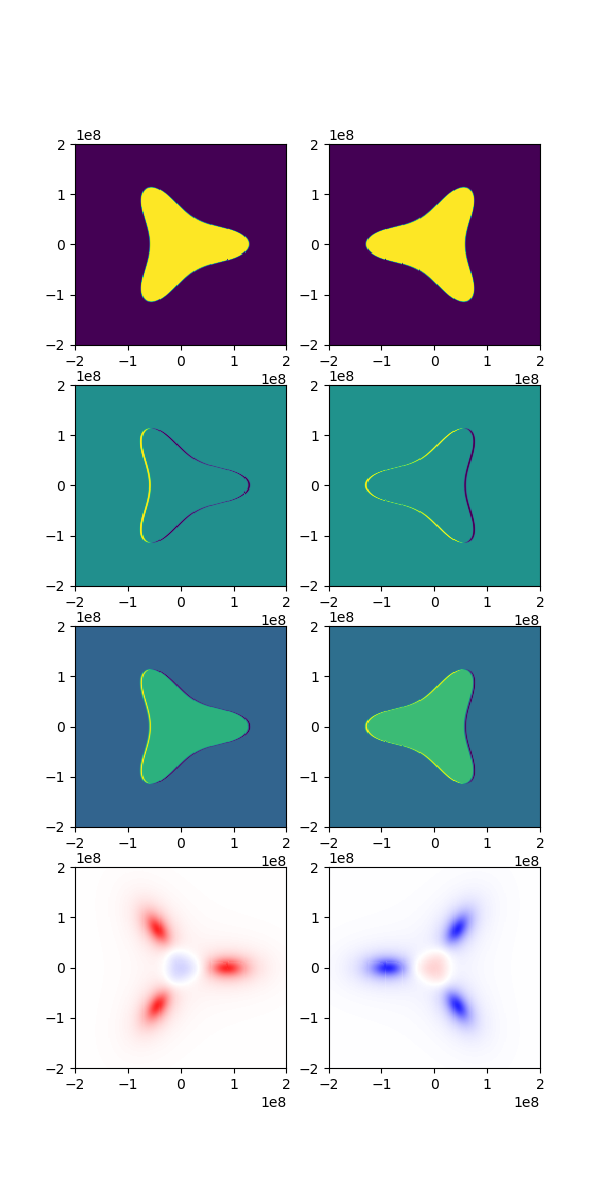

In [127]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(6,12))

ax[0,0].pcolormesh(Kx, Ky, f[n])
ax[0,1].pcolormesh(Kx, Ky, f2[n])

ax[1,0].pcolormesh(Kx, Ky, fx[n])
ax[1,1].pcolormesh(Kx, Ky, fx2[n])

a=5e6
ax[2,0].pcolormesh(Kx, Ky, f[n] + a*fx[n])
ax[2,1].pcolormesh(Kx, Ky, f2[n] + a*fx2[n])

ax[-1,0].pcolormesh(Kx, Ky, Omega[n], cmap='bwr', norm=norm)
ax[-1,1].pcolormesh(Kx, Ky, Omega2[n], cmap='bwr', norm=norm)

### Flip K' valley over x
For any function $g(x)$, the integral $\int_a^b dx\,g(x)$ is equivalent to $\int_{-b}^{-a} dx\, g(-x)$. For limits $a=-b$, this becomes $\int_a^b dx\, g(-x)$.

The magnetization is an integral roughly $\propto \int dk_x f(\mathbf k)\Omega(\mathbf k)$. From the above, if the limits of integration are symmetric around zero, this integral is equivalent to $\int dk_x f(-\mathbf k)\Omega(-\mathbf k)$.

In [128]:
f2p = f2[:, ::-1, :]
fx2p = fx2[:, ::-1, :]
Omega2p = Omega2[:, ::-1, :]

fo = f*Omega
fxo = fx*Omega

fo2 = f2p*Omega2p
fxo2 = fx2p * Omega2p

In [129]:
def pcolormesh(ax, data, vmin, vmax):
    ax.pcolormesh(Kx, Ky, data, cmap='bwr', vmin=vmin, vmax=vmax)

<IPython.core.display.Javascript object>


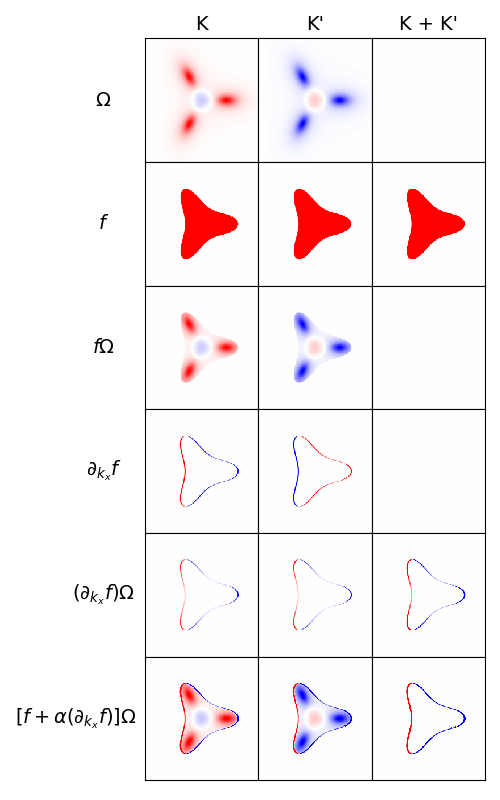

In [130]:
fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(5,8))

v = abs( Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[0,0], Omega[n], vmin, vmax)
pcolormesh(ax[0,1], Omega2p[n], vmin, vmax)
pcolormesh(ax[0,2], Omega[n] + Omega2p[n], vmin, vmax)

v = abs(f[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[1,0], f[n], vmin, vmax)
pcolormesh(ax[1,1], f2p[n], vmin, vmax)
pcolormesh(ax[1,2], f[n] + f2p[n], vmin, vmax)

v = abs(fo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[2,0], fo[n], vmin, vmax)
pcolormesh(ax[2,1], fo2[n], vmin, vmax)
pcolormesh(ax[2,2], fo[n] + fo2[n], vmin, vmax)

v = abs(fx[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[3,0], fx[n], vmin, vmax)
pcolormesh(ax[3,1], fx2p[n], vmin, vmax)
pcolormesh(ax[3,2], fx[n] + fx2p[n], vmin, vmax)

v = abs(fxo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[4,0], fxo[n], vmin, vmax)
pcolormesh(ax[4,1], fxo2[n], vmin, vmax)
pcolormesh(ax[4,2], fxo[n]+ fxo2[n], vmin, vmax)

a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
pcolormesh(ax[5,0], fo[n] + a*fxo[n], vmin, vmax)
pcolormesh(ax[5,1], fo2[n] + a*fxo2[n], vmin, vmax)
pcolormesh(ax[5,2], fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n], vmin, vmax)


for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0,0].set_title('K', fontsize=14)
ax[0,1].set_title('K\'', fontsize=14)
ax[0,2].set_title('K + K\'', fontsize=14)

ax[0,0].set_ylabel(r'$\Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[1,0].set_ylabel(r'$f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[2,0].set_ylabel(r'$f \Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[3,0].set_ylabel(r'$\partial_{k_x} f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[4,0].set_ylabel(r'$(\partial_{k_x} f) \Omega$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[5,0].set_ylabel(r'$[f + \alpha (\partial_{k_x} f)]\Omega$', rotation=0, labelpad=50, fontsize=14, va='center')



plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('Fermi_surface_Omega.png', bbox_inches='tight')

# Include all terms in integrand

In [131]:
f2p = f2[:, ::-1, :]
fx2p = fx2[:, ::-1, :]
Omega2p = Omega2[:, ::-1, :]
Mu2p = Mu2[:, ::-1, :]
E2p = E2[:, ::-1, :]

I = (Mu*muB + q*Omega/hbar * (EF - E)) 
Ip = (Mu2p*muB + q*Omega2p/hbar * (EF - E2p))

fo = f*I
fxo = fx*I

fo2 = f2p*Ip
fxo2 = fx2p * Ip

In [132]:
def pcolormesh(ax, data, vmin, vmax):
    ax.pcolormesh(Kx, Ky, data, cmap='bwr', vmin=vmin, vmax=vmax)

<IPython.core.display.Javascript object>


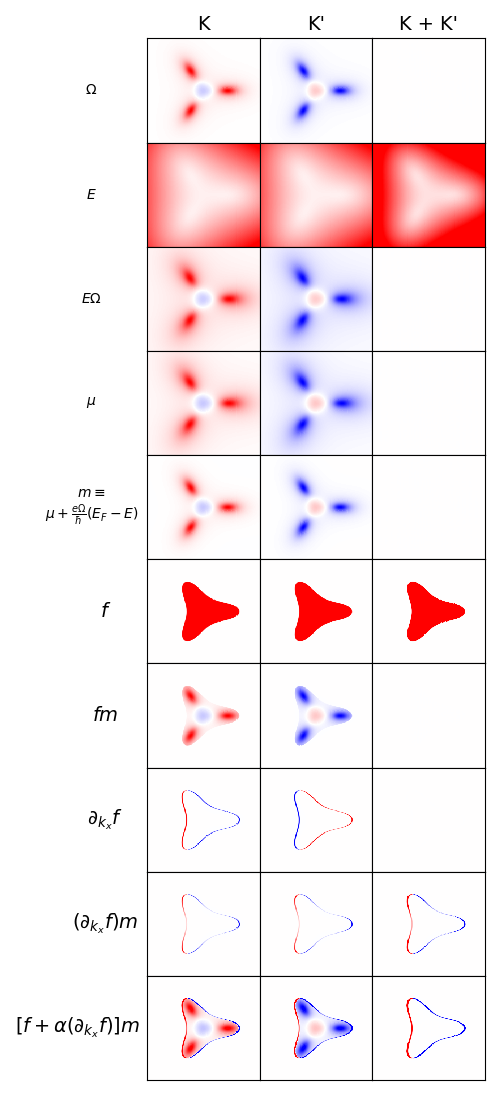

In [133]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(5,11))

v = abs(Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[0,0], Omega[n], vmin, vmax)
pcolormesh(ax[0,1], Omega2p[n], vmin, vmax)
pcolormesh(ax[0,2], Omega[n] + Omega2p[n], vmin, vmax)

v = abs(EF- E2[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[1,0], E[n], vmin, vmax)
pcolormesh(ax[1,1], E2p[n], vmin, vmax)
pcolormesh(ax[1,2], E[n] + E2p[n], vmin, vmax)

v = abs( E[n] * Omega[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[2,0], E[n] * Omega[n], vmin, vmax)
pcolormesh(ax[2,1], E2p[n]* Omega2p[n], vmin, vmax)
pcolormesh(ax[2,2], E[n]* Omega[n] + E2p[n]* Omega2p[n], vmin, vmax)

v = abs( Mu2[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[3,0], Mu[n], vmin, vmax)
pcolormesh(ax[3,1], Mu2p[n], vmin, vmax)
pcolormesh(ax[3,2], Mu[n] + Mu2p[n], vmin, vmax)

v = abs( I[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[4,0], I[n], vmin, vmax)
pcolormesh(ax[4,1], Ip[n], vmin, vmax)
pcolormesh(ax[4,2], I[n] + Ip[n], vmin, vmax)

v = abs(f[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[5,0], f[n], vmin, vmax)
pcolormesh(ax[5,1], f2p[n], vmin, vmax)
pcolormesh(ax[5,2], f[n] + f2p[n], vmin, vmax)

v = abs(fo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[6,0], fo[n], vmin, vmax)
pcolormesh(ax[6,1], fo2[n], vmin, vmax)
pcolormesh(ax[6,2], fo[n] + fo2[n], vmin, vmax)

v = abs(fx[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[7,0], fx[n], vmin, vmax)
pcolormesh(ax[7,1], fx2p[n], vmin, vmax)
pcolormesh(ax[7,2], fx[n] + fx2p[n], vmin, vmax)

v = abs(fxo[n]).max()
vmin, vmax = -v, v
pcolormesh(ax[8,0], fxo[n], vmin, vmax)
pcolormesh(ax[8,1], fxo2[n], vmin, vmax)
pcolormesh(ax[8,2], fxo[n]+ fxo2[n], vmin, vmax)

a=50e6
v = abs(fo[n] + a*fxo[n]).max()/4
vmin, vmax = -v, v
pcolormesh(ax[9,0], fo[n] + a*fxo[n], vmin, vmax)
pcolormesh(ax[9,1], fo2[n] + a*fxo2[n], vmin, vmax)
pcolormesh(ax[9,2], fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n], vmin, vmax)


for axis in ax.flatten():
    axis.set_xticks([])
    axis.set_yticks([])
    
ax[0,0].set_title('K', fontsize=14)
ax[0,1].set_title('K\'', fontsize=14)
ax[0,2].set_title('K + K\'', fontsize=14)

ax[0,0].set_ylabel(r'$\Omega$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[1,0].set_ylabel(r'$E$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[2,0].set_ylabel(r'$E\Omega$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[3,0].set_ylabel(r'$\mu$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[4,0].set_ylabel(r'$m \equiv$' '\n' r'$\mu + \frac{e\Omega}{\hbar}(E_F-E)$', rotation=0, labelpad=40, fontsize=10, va='center')
ax[5,0].set_ylabel(r'$f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[6,0].set_ylabel(r'$f m$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[7,0].set_ylabel(r'$\partial_{k_x} f$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[8,0].set_ylabel(r'$(\partial_{k_x} f) m$', rotation=0, labelpad=30, fontsize=14, va='center')
ax[9,0].set_ylabel(r'$[f + \alpha (\partial_{k_x} f)]m$', rotation=0, labelpad=50, fontsize=14, va='center')



plt.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig('Fermi_surface.png', bbox_inches='tight')

In [137]:
I = fo2[n] + a*fxo2[n] + fo[n] + a*fxo[n]

In [138]:
from scipy.integrate import simps

In [139]:
simps(simps(I, kx, axis=-2), ky, axis=-1)

6.638325181208265e-09

# Troubleshoot mag moment

Magnetic moment for a particle-hole symmetric two-band model (as we should have) is $\mu_n = \frac{e}{\hbar}\Omega E_n$.

<IPython.core.display.Javascript object>


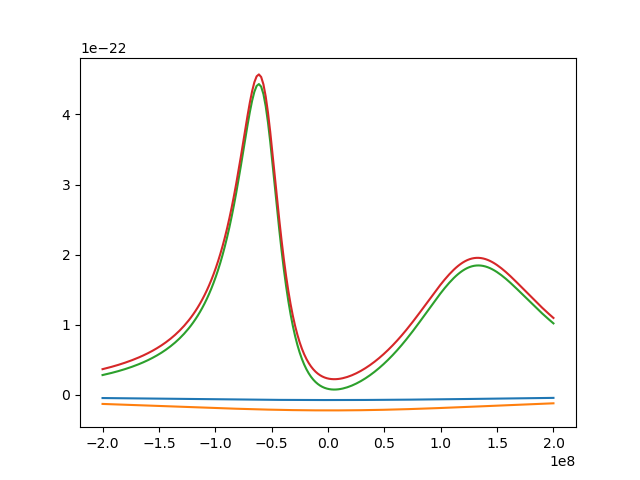

In [121]:
j = 120
fig, ax = plt.subplots()
for n in range(2):
    ax.plot(kx, Mu[n,:,j]*muB)
    ax.plot(kx, q*Omega[n,:,j]/hbar * (E[n,:,j]))
    # ax.plot(kx, Mu[n,:,j]*muB + q*Omega[n,:,j]/hbar * (EF-E2[n,:,j]))

In [25]:
for n, (e_n, psi_n) in enumerate(zip(E, Psi)):
    for m, (e_m, psi_m) in enumerate(zip(E, Psi)):
        pass

In [107]:
pn = Psi[1,:,0,0]
pm = Psi[0,:,0,0]

en, em = E[1], E[0]

In [105]:
from blg_strain.hamiltonian import H2_dkx, H2_dky, H_dkx, H_dky

In [98]:
hdkx, hdky = H2_dkx(0,0,1), H2_dky(0,0,1)

In [99]:
pn.conj().dot(hdkx).dot(pm) * pm.conj().dot(hdky).dot(pn)

(7.775385866813648e-22+4.108273768685512e-22j)

In [100]:
np.allclose(en - em, 2*en)

True

In [122]:
hdkx, hdky = H_dkx(xi), H_dky(xi)

Omega = np.zeros_like(Psi, dtype='float')  # N x N x Nkx x Nky; first dim
Mu = np.zeros_like(Psi, dtype='float')     # summed over bands m != n

for n, (e_n, psi_n) in enumerate(zip(E, Psi)):
    for m, (e_m, psi_m) in enumerate(zip(E, Psi)):
        if n == m: # sum runs over m != n
            continue

        prod1 = np.einsum('ijk,il,ljk->jk', psi_n.conj(), hdkx, psi_m,
                    optimize=True)
        prod2 = np.einsum('ijk,il,ljk->jk', psi_m.conj(), hdky, psi_n,
                    optimize=True)

        Omega[m, n] = np.imag(np.multiply(prod1, prod2) / (e_n - e_m) ** 2)
        Mu[m, n] = np.imag(np.multiply(prod1, prod2) / (e_n - e_m))

# Omega = Omega.sum(axis=0)  # perform the sum over bands
# Mu = Mu.sum(axis=0)

# Omega = -2 * Omega
# Mu = -q / hbar * Mu

In [123]:
Omega[:,:,0,0]

array([[ 0.00000000e+00, -4.02076241e-20,  1.60898717e-21,
         2.87071908e-21],
       [ 4.02076241e-20,  0.00000000e+00,  9.76778671e-19,
         1.60898717e-21],
       [-1.60898717e-21, -9.76778671e-19,  0.00000000e+00,
        -4.02076241e-20],
       [-2.87071908e-21, -1.60898717e-21,  4.02076241e-20,
         0.00000000e+00]])

In [61]:
np.allclose(Omega*E*q/hbar, Mu)

True

In [63]:
Mu.shape

(2, 200, 200)

In [75]:
xi = 1
kx, ky, Kx, Ky, E, Psi = get_bands(kxlims=kxlims, kylims=kxlims, Delta=Delta, delta=delta, theta=0, ham='4x4')
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi)

In [76]:
np.allclose(Omega*E*q/hbar, Mu*muB)

True